In [2]:
pip install fitter

  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25015 sha256=cee714cef7fa7c3a063b86eeb655eae99546ec5033cdf4b38e92b8f43c1e388b
  Stored in directory: c:\users\lynch08\appdata\local\pip\cache\wheels\3b\8e\cb\505518075a659232287a9689543b465e2dd9fa662ac8fc8086
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64216 sha256=2e2dbfbff5536dadc1d41d56a78aace7876e900ea9829f6d5aa3e60bf2e2aa6d
  Stored in directory: c:\users\lynch08\appdata\local\pip\cache\wheels\e2\47\9f\de01f291cfde341b33383bcf1292b17d64c700d4a12b318a7d
Successfully built fitter easydev
Note: you may need to restart the kernel to use updated packages.


In [32]:
from fitter import Fitter
import pandas as pd
import sklearn.neighbors as nei
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [5]:
data = pd.read_csv('AnnualTicketSales_Clean.csv')

In [15]:
data['TOT BOX OFFICE($)']

0      3881777912
1      2048534616
2     11253443955
3     11948096650
4     10993991460
5     11267115924
6     11155900636
7     10272985008
8     10887446341
9     10992141616
10    10173519704
11    10482254025
12    10639257284
13     9750744148
14     9769854914
15     9161738221
16     8800805718
17     9287996519
18     9193277289
19     9155147215
20     8296849636
21     7532311479
22     7338894852
23     6771575283
24     6230235770
25     5769078886
26     5314421390
Name: TOT BOX OFFICE($), dtype: int64

In [25]:
f = data['AVE TICKET PRICE($)'].values

In [26]:
f = Fitter(f)

In [27]:
f.fit()

C:\Users\lynch08\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1790: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\Users\lynch08\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4530: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
C:\Users\lynch08\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1790: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\Users\lynch08\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1790: IntegrationWarning: The maximum numbe

In [30]:
f.get_best()

{'johnsonsb': {'a': -0.633757647960426,
  'b': 0.10087566730787302,
  'loc': 4.345916376022547,
  'scale': 4.814083623977454}}

In [20]:
data['TOT BOX OFFICE($)']

,Unnamed: 0,YEAR,TICKETS SOLD,TOT BOX OFFICE($),TOT INFLATION ADJ BOX OFFICE($),AVE TICKET PRICE($)
0,0,2021,423774881,3881777912,3881777912,9.16
1,1,2020,223638958,2048534616,2048534616,9.16
2,2,2019,1228541629,11253443955,11253444050,9.16
3,3,2018,1311536128,11948096650,12013670952,9.11
4,4,2017,1225639761,10993991460,11226860216,8.97
5,5,2016,1302556378,11267115924,11931416424,8.65
6,6,2015,1323356776,11155900636,12121948075,8.43
7,7,2014,1257402920,10272985008,11517810744,8.17
8,8,2013,1339168926,10887446341,12266787382,8.13
9,9,2012,1380921942,10992141616,12649244986,7.96


In [21]:
inputs = data[['TICKETS SOLD','TOT BOX OFFICE($)','TOT INFLATION ADJ BOX OFFICE($)', 'AVE TICKET PRICE($)']]
outputs = data['YEAR']

In [ ]:
round(data.describe().loc[['mean','std', 'min', 'max']]['protein'],2)

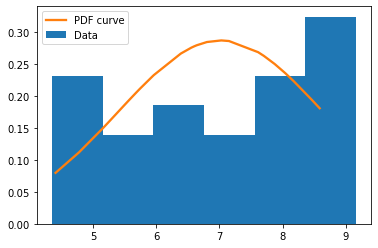

In [36]:
lower, upper = data['AVE TICKET PRICE($)'].min(), data['AVE TICKET PRICE($)'].max()
mu, sigma = data['AVE TICKET PRICE($)'].mean(), data['AVE TICKET PRICE($)'].std()

# create an object X using the above four parameters,
X = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)

# generate 300 sample data
samples = X.rvs(30)

# compute the PDF of the sample data
pdf_probs = stats.truncnorm.pdf(samples, (lower-mu)/sigma, (upper-mu)/sigma, mu, sigma)

# make a histogram for the samples
plt.hist(data['AVE TICKET PRICE($)'], bins=6, density=True, label='Data')

# plot the PDF curves 
plt.plot(samples[samples.argsort()],pdf_probs[samples.argsort()],linewidth=2.3,label='PDF curve')

# legend
plt.legend(loc='best')
plt.show()

In [37]:
samples

array([6.80194282, 6.63965003, 8.17911302, 4.40976993, 5.23879834,
       5.66899439, 5.35757473, 6.38877932, 8.45860075, 8.16598796,
       5.58066905, 8.05404816, 7.0287001 , 5.74554074, 5.95410582,
       5.14871836, 5.48726555, 8.03166475, 8.58371726, 4.78013128,
       7.87218018, 6.55358422, 5.72669009, 7.61010756, 7.70161548,
       5.42438601, 5.96300573, 7.14978736, 5.9472319 , 6.59857061])